# **Hồ Công Phùng - 18021014**

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
%cd /content/drive/MyDrive/-speech_processing_hocongphung

/content/drive/MyDrive/-speech_processing_hocongphung


In [66]:
!ls

data


In [67]:
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import re
import os

# Tách khẩu âm

In [68]:
!pip install pydub

In [69]:
from pydub.playback import play 
from pydub import AudioSegment

In [119]:
pip install ffmpeg==1

ERROR: Could not find a version that satisfies the requirement ffmpeg==1 (from versions: 1.1.0, 1.2.0, 1.2.1, 1.3, 1.4)
ERROR: No matching distribution found for ffmpeg==1


In [117]:
for i in range(1,101):
  try:
    AudioSegment.from_file(file="data/{n}.wav".format(n =i), format="wav" )
    print(i)
  except:
    pass

2
75
76
80


In [106]:
def get_command(name): 
    commands = []
    audio_file = AudioSegment.from_file(file="data/{n}.wav".format(n = name), format="wav" )
    file = open("data/{n}.txt".format(n = name), "r", encoding="utf8")
    for line in file:
        arr = line.split()
        commands.append({
            "audio" : audio_file[float(arr[0])*1000:float(arr[1])*1000] ,
            "command": arr[2]
        })
    return commands

In [118]:
list_file_commands = [get_command("{}".format(i)) for i in range(1,101)]
list_file_commands

CouldntDecodeError: ignored

In [9]:
len(list_file_commands)

NameError: ignored

In [ ]:
list_label = ['len', 'xuong', 'trai', 'phai', 'ban', 'A', 'B', 'nhay', 'sil']
for i in list_label:
  os.mkdir("data/{}".format(i))

In [ ]:
# export data theo tung label
dic_len_of_each_label = {}
for label in list_label:
  list_cmd = []
  for file_command in list_file_commands:
    tmp_list = [i for i in file_command if i["command"] == "{}".format(label)]
    list_cmd += tmp_list

  for i in range(len(list_cmd)):
      list_cmd[i]["audio"].export("data/{}/file{}.wav".format(label,i), format="wav")
  dic_len_of_each_label[label] = len(list_cmd)

dic_len_of_each_label

{'A': 122,
 'B': 135,
 'ban': 118,
 'len': 125,
 'nhay': 139,
 'phai': 112,
 'sil': 197,
 'trai': 128,
 'xuong': 120}

# Trích xuất đặc trưng MFCC

## Loading audio files with Librosa

In [ ]:
dir_cmd = {}
list_label = ['len', 'xuong', 'trai', 'phai', 'ban', 'A', 'B', 'nhay', 'sil']

for i in list_label:
  dir_cmd["{}_audio_file".format(i)] = "data/{}/file1.wav".format(i)

dir_cmd

{'A_audio_file': 'data/A/file1.wav',
 'B_audio_file': 'data/B/file1.wav',
 'ban_audio_file': 'data/ban/file1.wav',
 'len_audio_file': 'data/len/file1.wav',
 'nhay_audio_file': 'data/nhay/file1.wav',
 'phai_audio_file': 'data/phai/file1.wav',
 'sil_audio_file': 'data/sil/file1.wav',
 'trai_audio_file': 'data/trai/file1.wav',
 'xuong_audio_file': 'data/xuong/file1.wav'}

In [ ]:
ipd.Audio(dir_cmd['A_audio_file'])

IN THIS PROJECT, I LOAD ONLY "A" LABEL AUDIO TO COMPUT MFCC , OTHERS LABEL DO THE SAME

In [ ]:
# load audio files with librosa
signal, sr = librosa.load(dir_cmd['A_audio_file'])

In [ ]:
len(signal), sr

(12288, 22050)

## Extracting MFCCs

In [ ]:
# more parameters from librosa.feature.melspectrogram
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)

In [ ]:
mfccs.shape

(13, 25)

In [ ]:
12288 / 512

24.0

## Visualising MFCCs

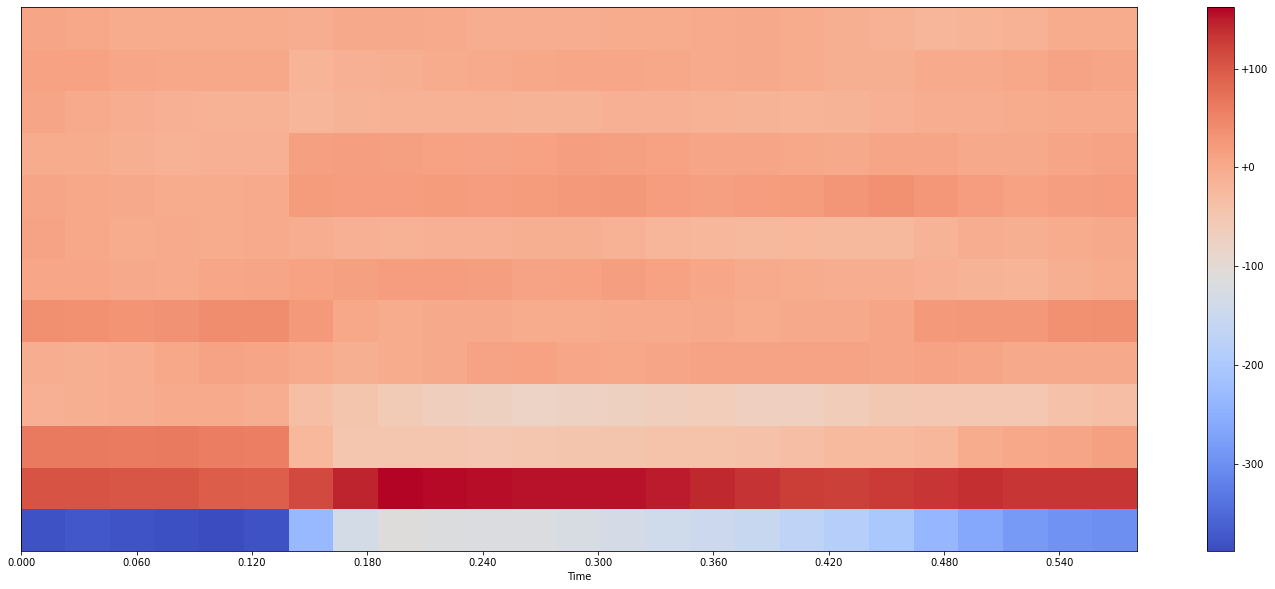

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

## Computing first / second MFCCs derivatives

In [ ]:
delta_mfccs = librosa.feature.delta(mfccs)

In [ ]:
delta_mfccs.shape

(13, 25)

In [ ]:
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

In [ ]:
delta2_mfccs.shape

(13, 25)

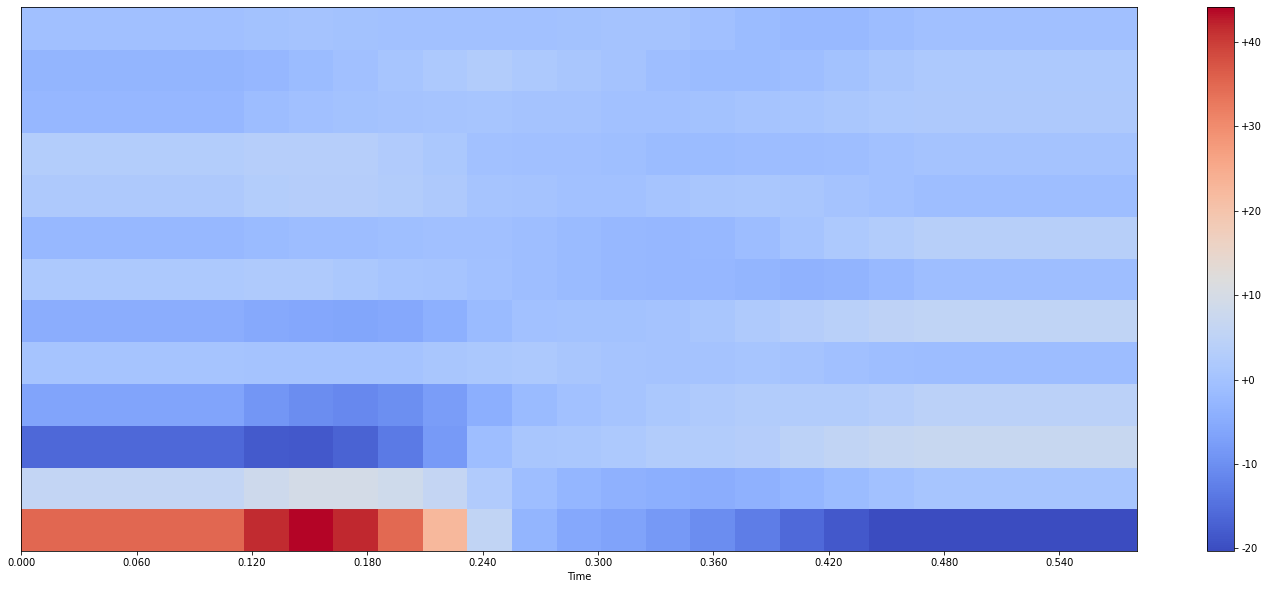

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

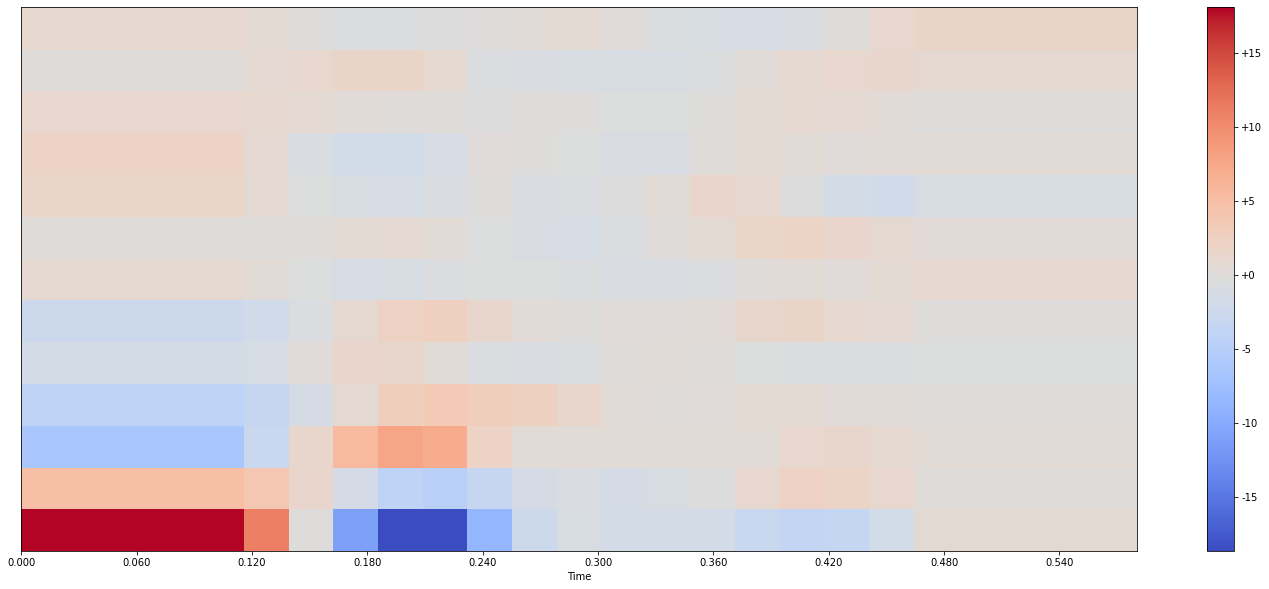

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [ ]:
mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))

In [ ]:
mfccs_features.shape

(39, 25)

# Sử dụng DTW để nhận dạng khẩu lệnh đơn lẻ

## Tính mfccs cho dữ liệu đầu vào

In [ ]:
ipd.Audio('data/A/file1.wav')

In [ ]:
ipd.Audio('data/A/file2.wav')

In [ ]:
ipd.Audio('data/A/file3.wav')

In [ ]:
def mfccs_features(path):
  signal, sr = librosa.load(path)
  mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)
  delta_mfccs = librosa.feature.delta(mfccs)
  delta2_mfccs = librosa.feature.delta(mfccs, order=2)
  return np.concatenate((mfccs, delta_mfccs, delta2_mfccs))

In [ ]:
mfccs_a1 = mfccs_features('data/A/file1.wav')
mfccs_a2 = mfccs_features('data/A/file2.wav')
mfccs_a3 = mfccs_features('data/A/file3.wav')

In [ ]:
mfccs_a1.shape, mfccs_a2.shape, mfccs_a3.shape

((39, 25), (39, 24), (39, 22))

In [ ]:
import copy
def preprocess_mfcc(mfcc):
    mfcc_cp = copy.deepcopy(mfcc)
    for i in range(mfcc.shape[1]):
        mfcc_cp[:,i] = mfcc[:,i] - np.mean(mfcc[:,i])
        mfcc_cp[:,i] = mfcc_cp[:,i]/np.max(np.abs(mfcc_cp[:,i]))
    return mfcc_cp

In [ ]:
mfccs_a1 = preprocess_mfcc(mfccs_a1)
mfccs_a2 = preprocess_mfcc(mfccs_a2)
mfccs_a3 = preprocess_mfcc(mfccs_a3)

## Tính mfccs trung bình

In [ ]:
metric = 'cosine'

In [ ]:
cost_matrix_01, align_01 = librosa.sequence.dtw(mfccs_a1, mfccs_a2, metric=metric)
cost_matrix_02, align_02 = librosa.sequence.dtw(mfccs_a1, mfccs_a3, metric=metric)

In [ ]:
align_01.shape, align_02.shape

((25, 2), (25, 2))

In [ ]:
count = np.ones(len(mfccs_a1[0]))
sum = mfccs_a1.copy()

In [ ]:
for i, j in align_01:
    count[i] += 1
    sum[:,i] += mfccs_a2[:,j]

for i, j in align_02:
    count[i] += 1
    sum[:,i] += mfccs_a3[:,j]

In [ ]:
average_mfccs = sum / count

In [ ]:
average_mfccs.shape

(39, 25)

## Nhận dạng khẩu lệnh

In [ ]:
list_label = ['len', 'xuong', 'trai', 'phai', 'ban', 'A', 'B', 'nhay', 'sil']

In [ ]:
list_cost=[]

for i in list_label:
  list_cost.append(librosa.sequence.dtw(mfccs_features('data/{}/file4.wav'.format(i)), 
                                         average_mfccs,
                                         metric=metric)[0][-1,-1])
  
list_cost

[1.5214167851616436,
 2.214919301485006,
 0.787985297784714,
 0.3831218447797481,
 0.5121300053940026,
 0.246831801208388,
 1.1421912288670495,
 0.9652514125573493,
 2.9823140379534454]

Khẩu lệnh cần nhận dạng là "A"

In [ ]:
list_label[np.argmin(list_cost)]

'A'

# Sử dụng HMM để nhận dạng khẩu lệnh

In [ ]:
def mfcc(wav_path, delta = 2):
    """
    Read .wav files and calculate MFCC
    :param wav_path: path of audio file
    :param delta: derivative order, default order is 2
    :return: mfcc
    """
    y, sr = librosa.load(wav_path)
    # MEL frequency cepstrum coefficient
    mfcc_feat = librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 13)
    ans = [mfcc_feat]
    # Calculate the 1st derivative
    if delta >= 1:
        mfcc_delta1 = librosa.feature.delta(mfcc_feat, order = 1, mode ='nearest')
        ans.append(mfcc_delta1)
    # Calculate the 2nd derivative
    if delta >= 2:
        mfcc_delta2 = librosa.feature.delta(mfcc_feat, order = 2, mode ='nearest')
        ans.append(mfcc_delta2)
    return np.transpose(np.concatenate(ans, axis = 0),[1,0])

In [ ]:
!pip install hmmlearn

     |████████████████████████████████| 129 kB 5.2 MB/s 


## Huấn Luyện Mô Hình

In [ ]:
from hmmlearn import hmm
import warnings

def train_model_hmm(train_dir):
    """
    :param train_dir: derivative order, default order is 2
    :return: hmm_models
    """
    hmm_models = []
    # iterate through the training directory
    for digit in os.listdir(train_dir):
        # get the directory of digit
        digit_dir = os.path.join(train_dir, digit)
        # get the digit label
        label = digit_dir[digit_dir.rfind('/') + 1:]
        # start training
        X = np.array([])
        train_files = [x for x in os.listdir(digit_dir) if x.endswith('.wav')]
        for file_name in train_files:
            file_path = os.path.join(digit_dir, file_name)
            # get mfcc feature and ignore the warning
            with warnings.catch_warnings():
                warnings.simplefilter('ignore')
                features_mfcc = mfcc(file_path)
            # append mfcc to X
            if len(X) == 0:
                X = features_mfcc
            else:
                X = np.append(X, features_mfcc, axis=0)

        # get the hmm model
        model = hmm.GaussianHMM(n_components=4, covariance_type='diag', n_iter=1800)
        # fit hmm model
        np.seterr(all='ignore')
        model.fit(X)
        hmm_models.append((model, label))
    return hmm_models

In [ ]:
hmm_models = train_model_hmm("./data")

## Đưa ra dự đoán

In [ ]:
max_score = -float('inf')


features_mfcc = mfcc("data_test/len/file0.wav")

for item in hmm_models:
  model, label = item
  score = model.score(features_mfcc)
  if score > max_score:
      max_score = score
      predicted_label = label

predicted_label

'len'